# Credit Card Fraud Detection

The project aims to build models that predicts fraudulent credit card transactions using machine learning models like Logistic Regression, KNN, and Random Forest Classifier. The project involves training, evaluating, and comparing these models with a Kaggle dataset(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data). The aim is to pinpoint the best algorithm or ensemble for accurate fraud detection, enhancing security in future transactions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Logistic Regression
SVM
Naive bayes


In [8]:
# sns.pairplot(df)
# plt.show()

In [9]:
count=df['Class'].value_counts()

In [10]:
count

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

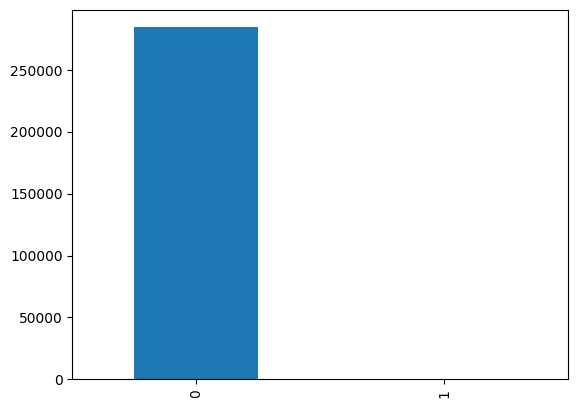

In [11]:
count.plot(kind='bar')

Here, we can see huge class imbalance in the dataset. So common approaches to address this imbalance is to apply resampling techniques ie oversampling or undersampling.  
Oversampling: Duplicate samples from the minority class to balance the class distribution.  
Undersampling: Reduce the number of samples from the majority class to balance the class distribution.

Let's proceed with a single technique for handling imbalanced classes. I will be doing undersampling with RandomUndersampler of sci-kit learn.

In [12]:
from sklearn.utils import resample

majority_class = df[df['Class'] == 0]
minority_class = df[df['Class'] == 1]

# Undersampling the majority class
undersampled_majority = resample(majority_class, replace=False,n_samples=len(minority_class), random_state=42)

# Combine minority class with undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution
print(undersampled_df['Class'].value_counts())

1    492
0    492
Name: Class, dtype: int64


In [13]:
undersample_count=undersampled_df['Class'].value_counts()

In [14]:
undersample_count

1    492
0    492
Name: Class, dtype: int64

<AxesSubplot:>

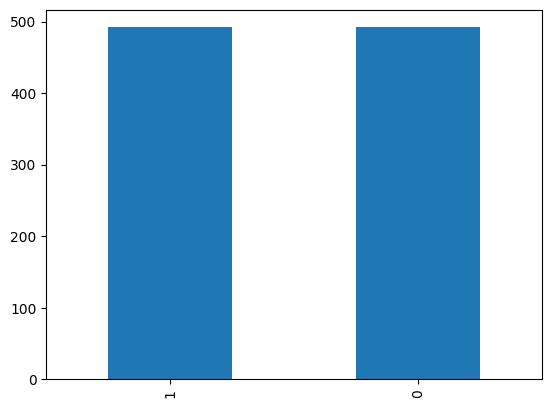

In [15]:
undersample_count.plot(kind='bar')

The dataset has been undersampled so now we can continue to train our dataset with multiple models.

## Training the models

In [16]:
df1=undersampled_df

In [17]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00,1
1,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,43.80,0
2,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1
3,78685.0,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,1.30,0
4,31244.0,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,18.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,37976.0,-2.045484,-0.603428,-0.386028,-3.278179,0.840525,3.868593,0.785816,1.183953,1.009150,...,0.147327,0.243740,-0.357663,1.052686,1.112681,-0.749815,-0.005714,-0.173156,350.00,0
980,60439.0,-0.377304,0.572787,1.333869,-0.000070,0.304511,-0.084981,0.497673,0.022442,0.100338,...,-0.023137,0.118389,-0.270359,-0.393864,-0.062653,0.510585,0.094780,0.126249,12.95,0
981,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.586829,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90,1
982,122517.0,1.554783,-1.059409,-0.658570,0.112271,-0.724124,-0.288185,-0.241162,-0.044019,0.879991,...,0.021068,-0.344273,0.131801,-0.336523,-0.569150,-0.302588,-0.035571,-0.008578,229.88,0


In [18]:
X=df1.drop(["Class"], axis=1)
y=df1["Class"]

In [19]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00
1,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,0.464675,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,43.80
2,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,1.003350,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90
3,78685.0,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.161347,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,1.30
4,31244.0,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.223027,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,18.56


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Class, dtype: int64

## Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [62]:
#Preparing the model
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
train_accuracy_LR=modelLR.score(X_train,y_train)
test_accuracy_LR=modelLR.score(X_test,y_test)

In [63]:
train_accuracy_LR

0.9250317662007624

In [64]:
test_accuracy_LR

0.9238578680203046

The model is a good fit.Since the accuracy for training and test data are nearly equal.

## Support Vector Machine

I have trained a logistic regression model and achieved an accuracy of 92%. This high accuracy suggests that our data is linearly separable. So we can set the kernel as 'linear' in SVM classifier.

In [78]:
from sklearn.svm import SVC
modelSVM = SVC(kernel="linear")
modelSVM.fit(X_train, y_train)

In [82]:
train_accuracy_SVM=modelSVM.score(X_train,y_train)
test_accuracy_SVM=modelSVM.score(X_test,y_test)

In [83]:
train_accuracy_SVM

0.9097839898348158

In [84]:
test_accuracy_SVM

0.9137055837563451

The accuracy for SVM model is also good.

## Naive Bayes

Using Gaussian Naive Bayes classifier. There are other NB classifiers too which we can check.

In [116]:
from sklearn.naive_bayes import GaussianNB  
modelNB = GaussianNB()  
modelNB.fit(X_train, y_train)

GaussianNB()

In [117]:
train_accuracy_NB=modelNB.score(X_train, y_train)
test_accuracy_NB=modelNB.score(X_test, y_test)

In [118]:
train_accuracy_NB

0.8602287166454892

In [119]:
test_accuracy_NB

0.8730964467005076

Text(0.5, 1.0, 'Comparison of Logistic, SVM and Naive Bayes classifiers')

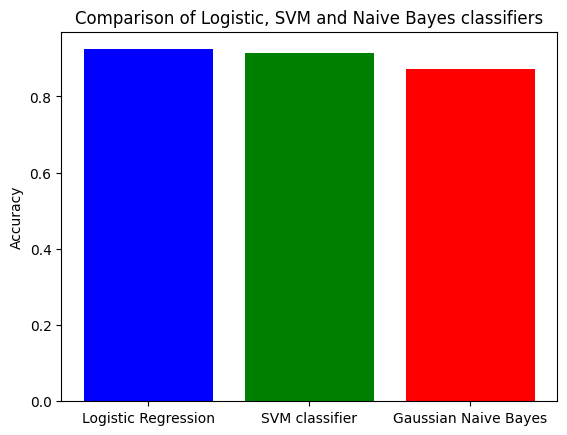

In [125]:
plt.bar(['Logistic Regression'], [test_accuracy_LR], label='LR', color='blue')
plt.bar(['SVM classifier'], [test_accuracy_SVM], label='SVM', color='green')
plt.bar(['Gaussian Naive Bayes'], [test_accuracy_NB], label='NB', color='red')

plt.ylabel('Accuracy')
plt.title('Comparison of Logistic, SVM and Naive Bayes classifiers')

### So the best model above there is Logistic Regression classifier with 92%.